# Exercise 1 - Brian Chen (bc604)

We first load a dataset and examine its dimensions.

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

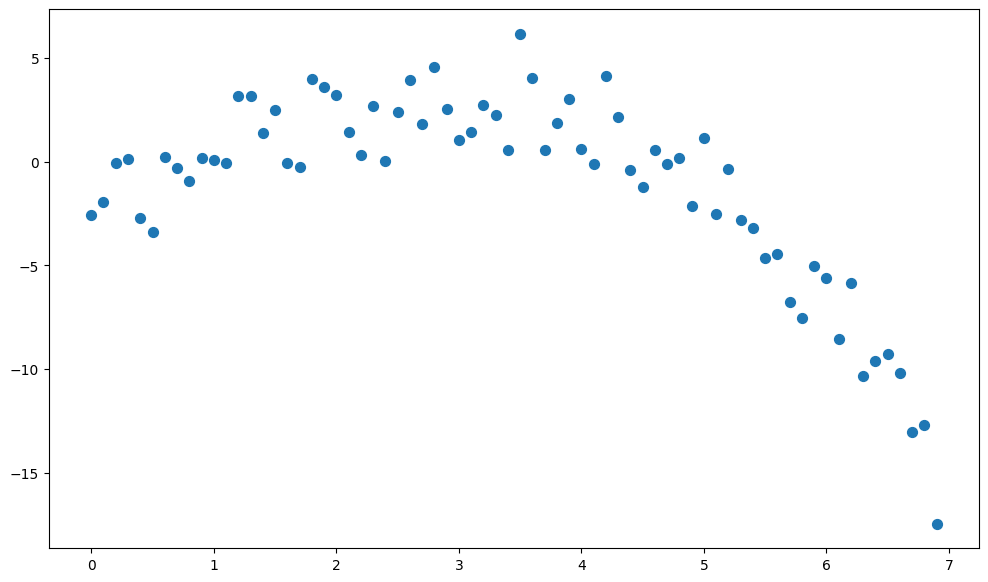

In [3]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]
plt.scatter(xy_data[:, 0], xy_data[:, 1], s=50)
plt.show()

### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [4]:
def polyreg(data_matrix, k):
    # The function should return the the coefficient vector beta, the fit, and the vector of residuals

    x = data_matrix[:, 0]
    y = data_matrix[:, 1]

    X = np.column_stack(([ x**t for t in range(k+1) ]))

    beta = np.linalg.lstsq(X, y, rcond=None)[0]
    fit = X.dot(beta)
    residuals = y - fit

    return (beta, fit, residuals)

Use the tests below to check the outputs of the function you have written:

In [5]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

k = 2, SSE = 172.18102528988547, R^2 = 0.8876
k = 3, SSE = 152.4058048891581, R^2 = 0.9005
k = 4, SSE = 151.22778969027124, R^2 = 0.9013


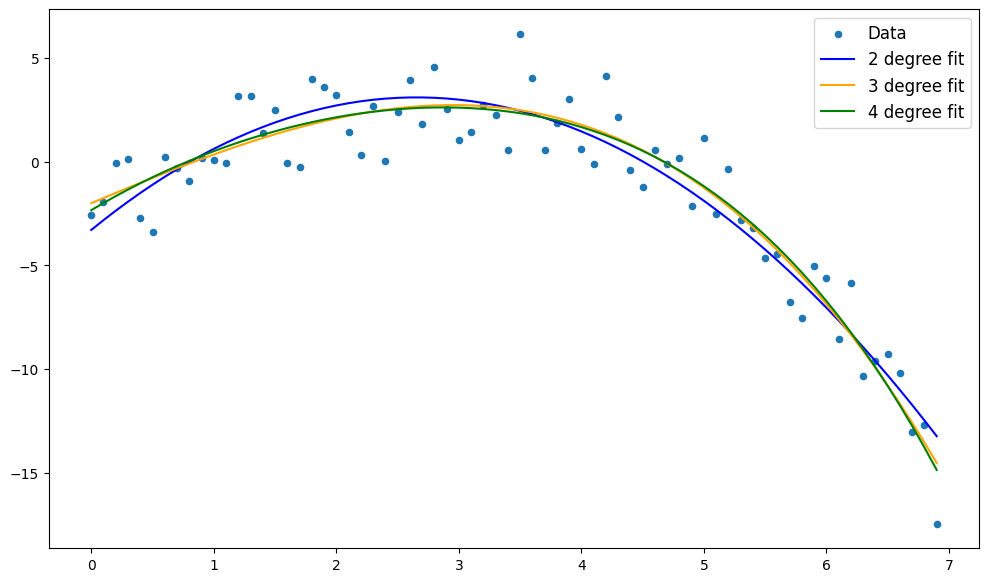

In [6]:
colours = ['', '', 'blue', 'orange', 'green']

fit_0 = np.mean(xy_data[:, 1]) * np.ones(np.shape(xy_data[:, 0]))
SSE_0 = np.linalg.norm(xy_data[:, 1] - fit_0) ** 2

def plot_fit(k):
    (_, fit, _) = polyreg(xy_data, k)
    plt.plot(xy_data[:, 0], fit, color=colours[k], label=f"{k} degree fit")
    SSE = np.linalg.norm(xy_data[:, 1] - fit) ** 2
    R2 = np.round(1 - SSE/SSE_0, decimals=4)
    print(f"k = {k}, SSE = {SSE}, R^2 = {R2}")
    return (SSE, R2)

plt.rcParams['figure.figsize'] = [12, 7]
plt.scatter(xy_data[:, 0], xy_data[:, 1], s=20, label='Data')
list(map(plot_fit, [2, 3, 4]))
plt.legend(fontsize = 'large')
plt.show()

#### State which model you choose and briefly justify your choice.
 
The 4 degree fit should be the best fit, since it has the lowest SSE value (and thus a R^2 closest to 1). This means it is the closest to the actual y values.

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

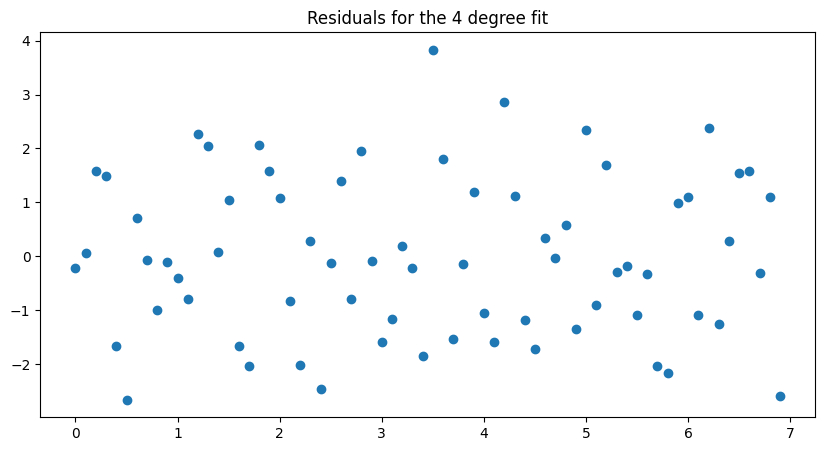

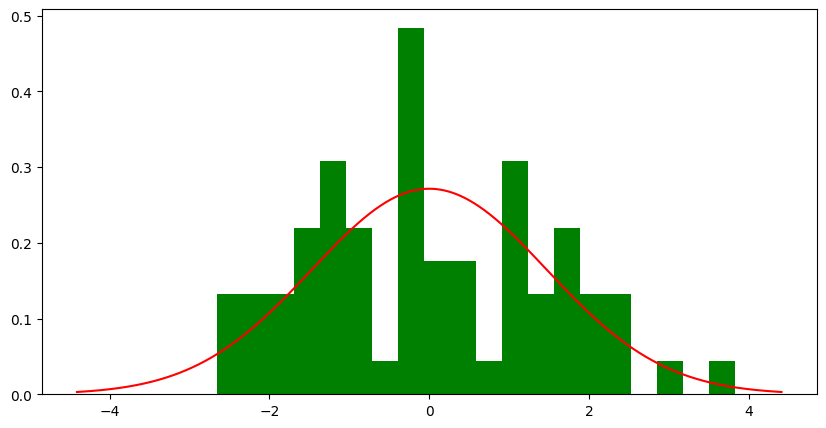

In [7]:
from scipy.stats import norm

(_, _, resid) = polyreg(xy_data, 4)

plt.rcParams['figure.figsize'] = [10, 5]
plt.scatter(xy_data[:, 0], resid)
plt.title('Residuals for the 4 degree fit')
plt.show()

n, bins, patches = plt.hist(resid, bins=20, density=True, facecolor='green');
resid_stdev = np.std(resid)
xvals = np.linspace(-3*resid_stdev,3*resid_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=resid_stdev), 'r')
plt.show()